In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')
#Importing Libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [2]:
from mpl_toolkits.mplot3d import Axes3D

In [3]:
# Loading the data.
df = pd.read_csv(r'C:\Users\Admin\Downloads\Countrydata.csv')
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


## Data Exploration

In [4]:
df.shape

(167, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


Okay so no missing values here.

There isnt much data cleaning to be done here for this particular dataset.

## EDA

Text(0.5, 1.0, 'Correlation of the variables')

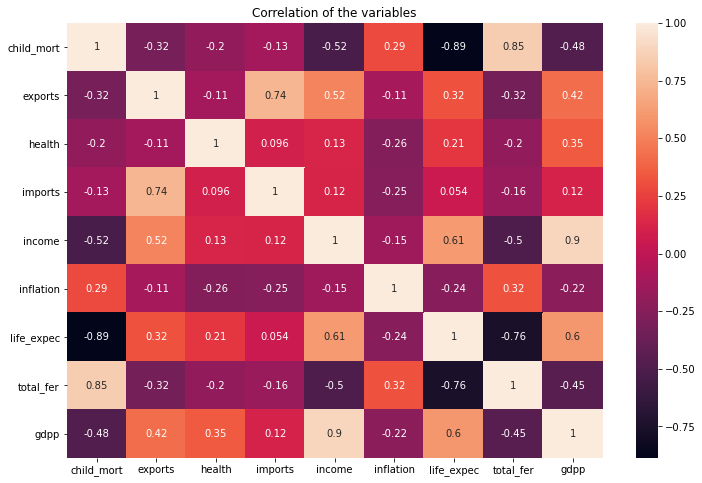

In [6]:
# Plotting a correlation matrix.
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(method='pearson'),annot=True)
plt.title('Correlation of the variables')

Henceforth, child_mortality and life_expentency are highly correlated with correlation of -0.89, child_mortality and total_fertility are highly correlated with correlation of 0.85, imports and exports are highly correlated with correlation of 0.74, life_expentency and total_fertility are highly correlated with correlation of -0.76.


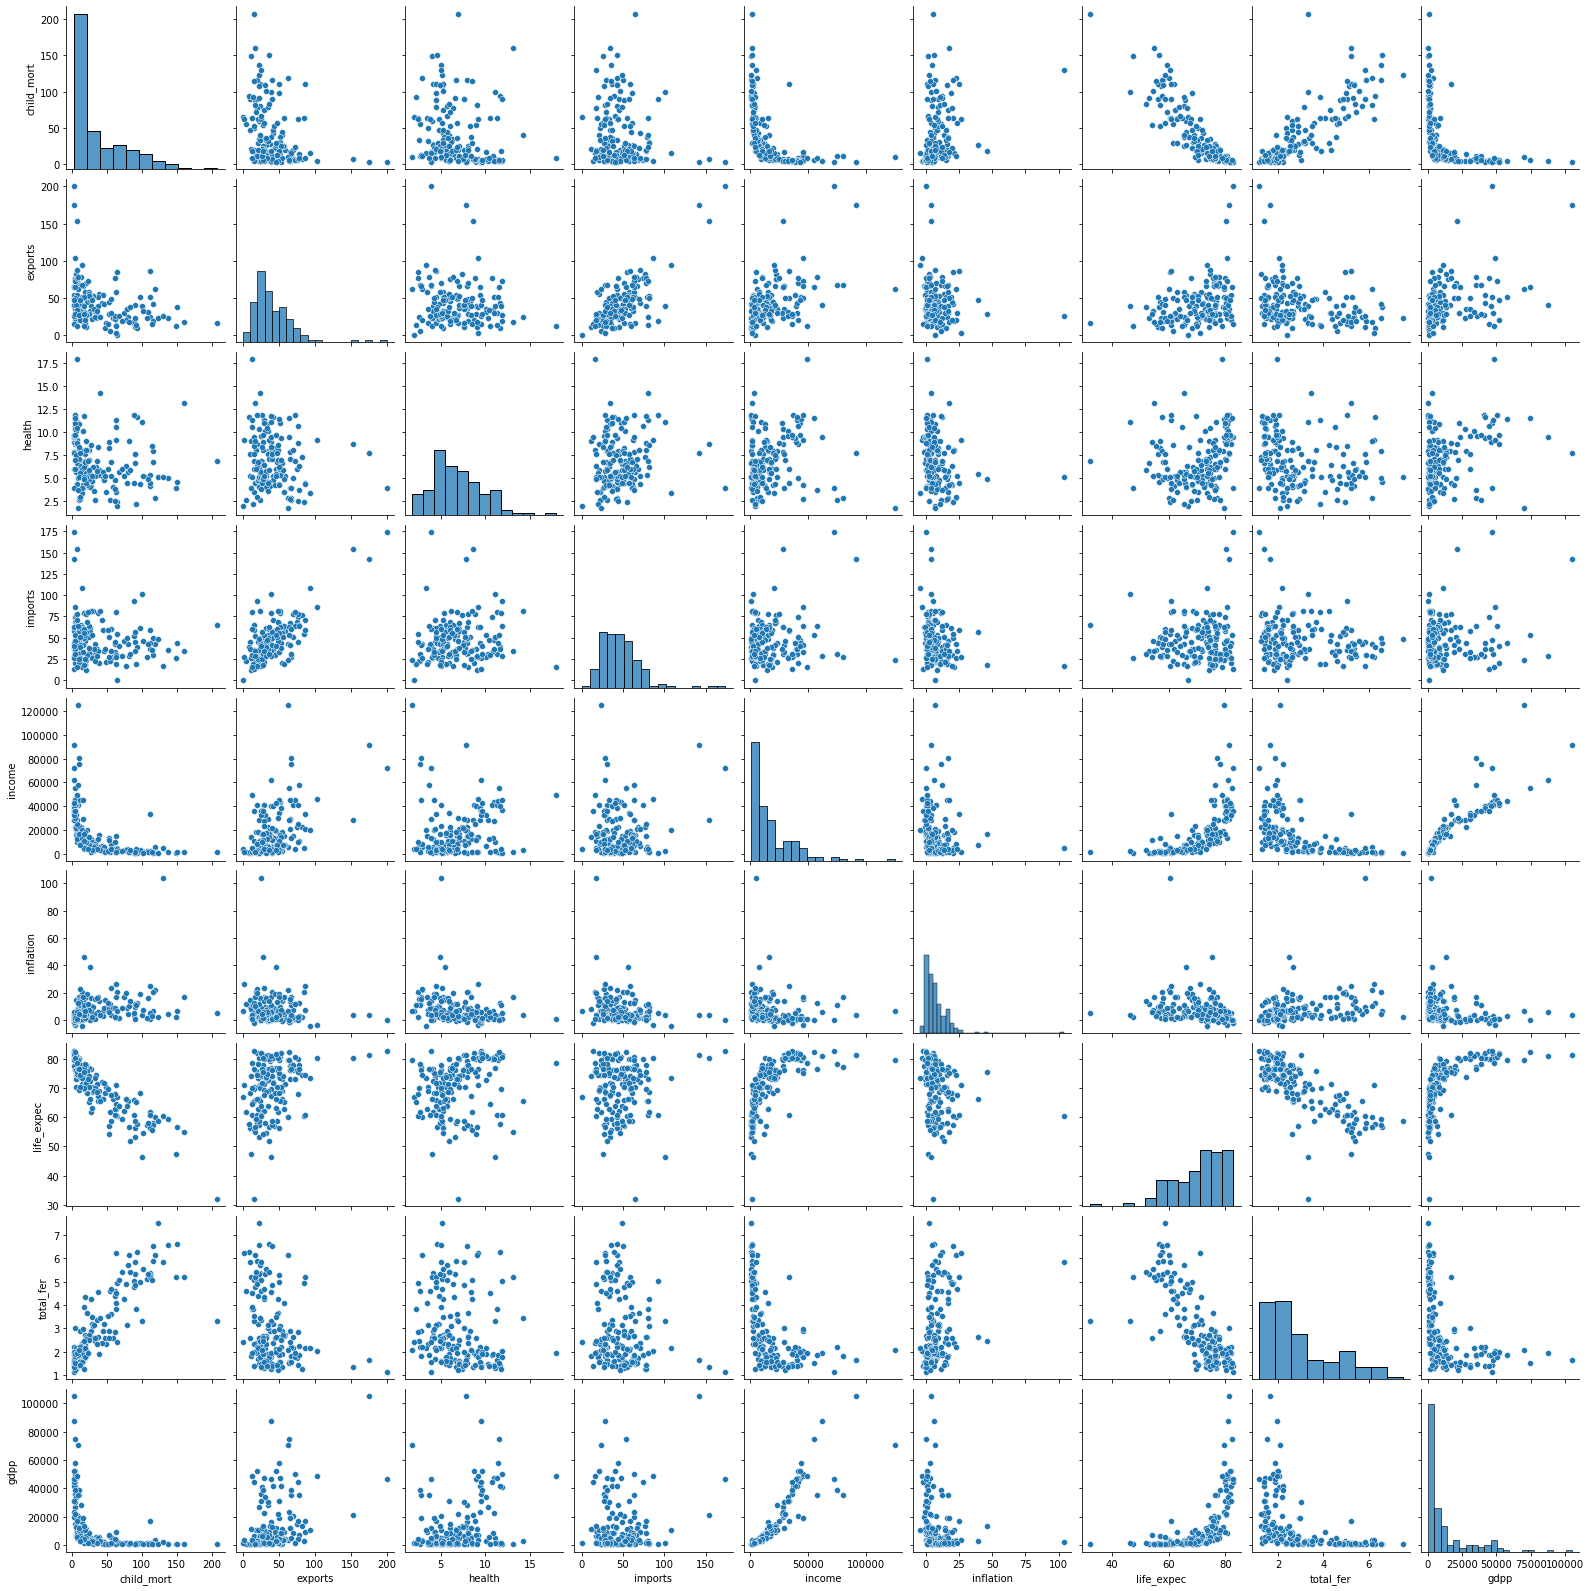

In [7]:
# Pairplot of all numeric columns
sns.pairplot(df)

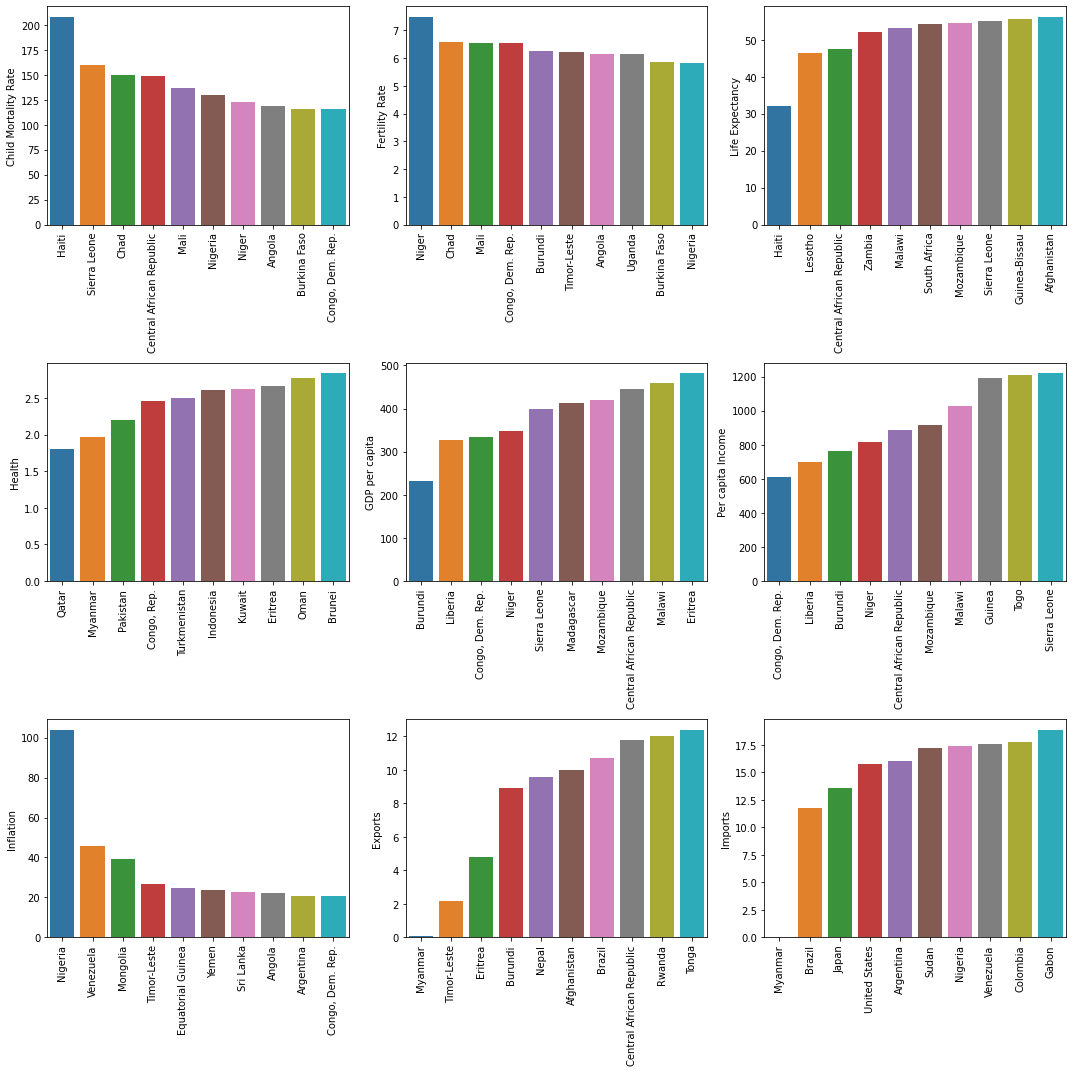

In [8]:
fig, axs = plt.subplots(3,3,figsize = (15,15))

# Child Mortality Rate : 

top10_child_mort = df[['country','child_mort']].sort_values('child_mort', ascending = False).head(10)
plt1 = sns.barplot(x='country', y='child_mort', data= top10_child_mort, ax = axs[0,0])
plt1.set(xlabel = '', ylabel= 'Child Mortality Rate')

# Fertility Rate: 
top10_total_fer = df[['country','total_fer']].sort_values('total_fer', ascending = False).head(10)
plt1 = sns.barplot(x='country', y='total_fer', data= top10_total_fer, ax = axs[0,1])
plt1.set(xlabel = '', ylabel= 'Fertility Rate')

# Life Expectancy: 

bottom10_life_expec = df[['country','life_expec']].sort_values('life_expec', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='life_expec', data= bottom10_life_expec, ax = axs[0,2])
plt1.set(xlabel = '', ylabel= 'Life Expectancy')

# Health :

bottom10_health = df[['country','health']].sort_values('health', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='health', data= bottom10_health, ax = axs[1,0])
plt1.set(xlabel = '', ylabel= 'Health')

# The GDP per capita :

bottom10_gdpp = df[['country','gdpp']].sort_values('gdpp', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='gdpp', data= bottom10_gdpp, ax = axs[1,1])
plt1.set(xlabel = '', ylabel= 'GDP per capita')

# Per capita Income : 

bottom10_income = df[['country','income']].sort_values('income', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='income', data= bottom10_income, ax = axs[1,2])
plt1.set(xlabel = '', ylabel= 'Per capita Income')


# Inflation: 

top10_inflation = df[['country','inflation']].sort_values('inflation', ascending = False).head(10)
plt1 = sns.barplot(x='country', y='inflation', data= top10_inflation, ax = axs[2,0])
plt1.set(xlabel = '', ylabel= 'Inflation')


# Exports:

bottom10_exports = df[['country','exports']].sort_values('exports', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='exports', data= bottom10_exports, ax = axs[2,1])
plt1.set(xlabel = '', ylabel= 'Exports')


# Imports: 

bottom10_imports = df[['country','imports']].sort_values('imports', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='imports', data= bottom10_imports, ax = axs[2,2])
plt1.set(xlabel = '', ylabel= 'Imports')

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation = 90)
    
plt.tight_layout()
plt.show()

In [9]:
data = df.drop('country', axis=1)
data.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


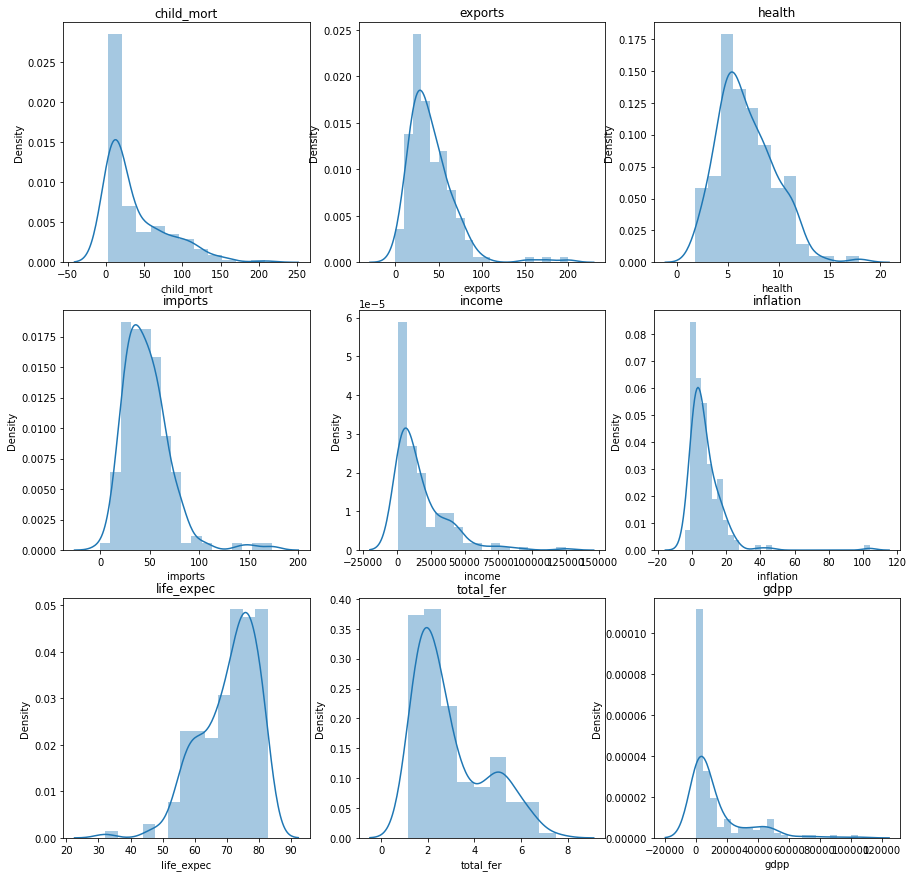

In [10]:
# Plotting all the features to visualise and look at their distribution.
plt.figure(figsize=(15,15))
features = data.columns
for i in enumerate(features):
    plt.subplot(3,3,i[0]+1)
    sns.distplot(data[i[1]])
    plt.title(str(i[1]))

All the variables have skewness but all are right-skewed and only life_expex is left-skewed which means there are outliers to check.

In [11]:
data.skew()

child_mort    1.450774
exports       2.445824
health        0.705746
imports       1.905276
income        2.231480
inflation     5.154049
life_expec   -0.970996
total_fer     0.967092
gdpp          2.218051
dtype: float64

## Outlier Analysis

Now we know there are a lot of outliers in almost all of the features but since there are poor countries and rich countries we can accept these from a business point of view. So losing the outliers will cause data loss. Hence we'll use Power transformer() to get rid of this skewness.

In [12]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
new_data = pd.DataFrame(pt.fit_transform(data))
new_data.columns = data.columns
new_data.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.266699,-1.671164,0.402266,0.064586,-1.368935,0.459416,-1.526455,1.544053,-1.462273
1,-0.220994,-0.380078,0.034400,0.226872,0.012538,-0.154659,0.621738,-0.992833,-0.121133
2,0.217834,0.105605,-0.991140,-0.610572,0.232275,1.059790,0.652698,0.313175,-0.063195
3,1.506186,0.943040,-1.727642,-0.026621,-0.408251,1.512843,-1.239045,1.623128,-0.219666
4,-0.637380,0.385850,-0.166030,0.641531,0.572583,-0.723442,0.699553,-0.368063,0.609228


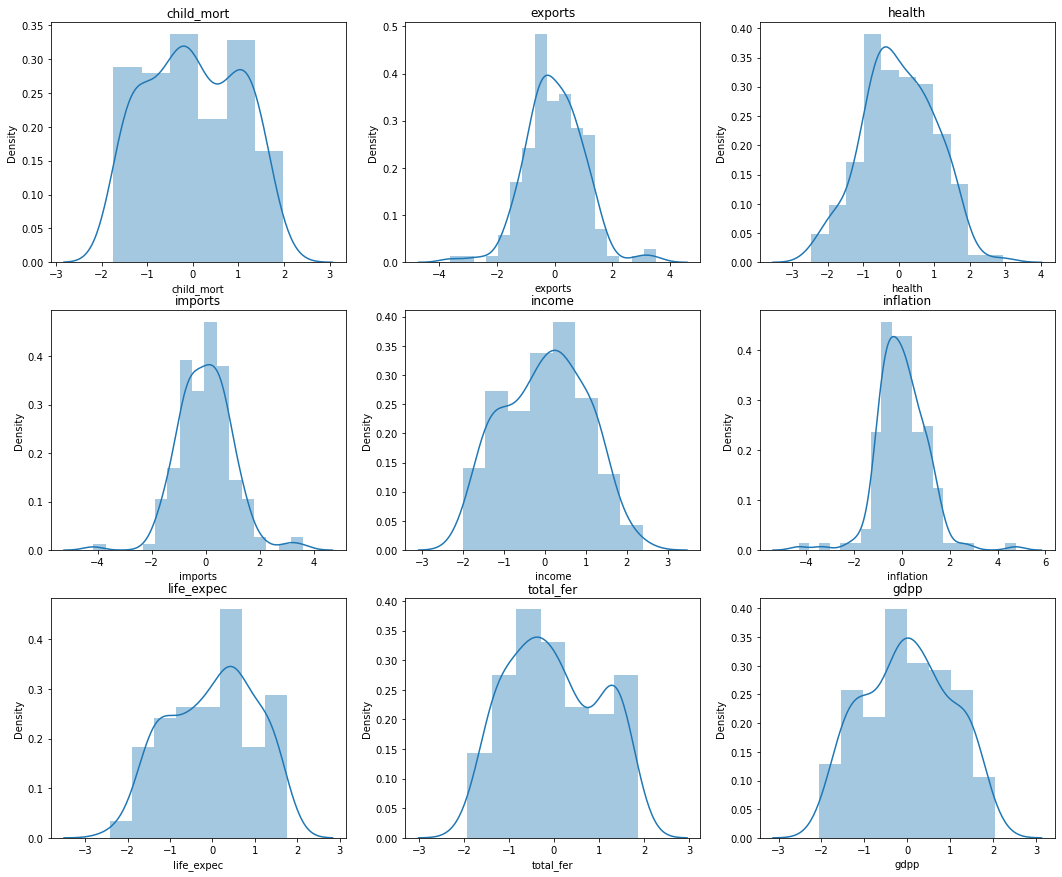

In [13]:
# Now lets look at the new dataframe.
plt.figure(figsize=(18,15))
features = new_data.columns
for i in enumerate(features):
    plt.subplot(3,3,i[0]+1)
    sns.distplot(new_data[i[1]])
    plt.title(str(i[1]))

In [14]:
new_data.skew()

child_mort    0.015754
exports       0.100036
health       -0.008500
imports       0.165346
income       -0.035867
inflation     0.182506
life_expec   -0.184956
total_fer     0.136536
gdpp          0.001120
dtype: float64

Okay now we can move forward with Hopkins Statistic.

## Hopkins Statistic

In [15]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [16]:
hopkins(new_data)

0.7565185696503873

Since the value is between 07 - 0.99, there is a high chance of clustering to be formed.

## Elbow Curve

In [17]:
#Finding Optimal number of Clusters using elbow methed
cluster_range = range( 1, 15)
cluster_errors = []
cluster_sil_scores = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 100,init='k-means++',random_state=0)
  clusters.fit(new_data)
  labels = clusters.labels_                     # capture the cluster lables
  centroids = clusters.cluster_centers_         # capture the centroids
  cluster_errors.append( clusters.inertia_ )    # capture the intertia
# combine the cluster_range and cluster_errors into a dataframe by combining them
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors} )
clusters_df[0:10] 

,num_clusters,cluster_errors
0,1,1503.000000
1,2,903.308344
2,3,744.744590
3,4,663.621992
4,5,596.257532
5,6,547.899306
6,7,502.190863
7,8,463.366961
8,9,428.688632
9,10,405.036565


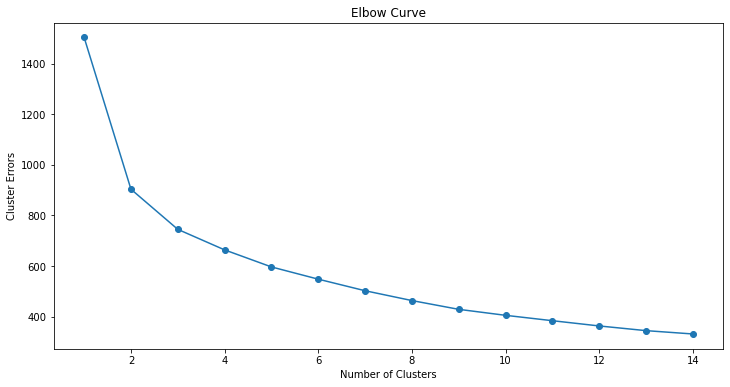

In [18]:
# Elbow Curve

plt.figure(figsize=(12,6))
plt.plot(clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )
plt.xlabel("Number of Clusters")
plt.ylabel("Cluster Errors")
plt.title("Elbow Curve")
plt.show()

From the above curve, we know that optimal number of clusters is 3.

## Silhoutte Score Analysis

In [19]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(new_data)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(new_data, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.33716089816523753
For n_clusters=3, the silhouette score is 0.2458399236482484
For n_clusters=4, the silhouette score is 0.22546021210526832
For n_clusters=5, the silhouette score is 0.21566384918687462
For n_clusters=6, the silhouette score is 0.23806754997213034
For n_clusters=7, the silhouette score is 0.22533207225994026
For n_clusters=8, the silhouette score is 0.2230939953879693


Here 2 has the highest silhoutte score. But, in practice, it is never considered. So we take k = 3 the second highest score followed by 4 and 5.

## K-Means Clustering

### Taking K = 3

In [20]:
# Lets perfom K means using K=3
kmean = KMeans (n_clusters=3, max_iter = 50, random_state=50)
kmean.fit(new_data)

KMeans(max_iter=50, n_clusters=3, random_state=50)

In [21]:
kmeans.labels_

array([5, 1, 7, 2, 1, 7, 7, 4, 4, 7, 1, 6, 0, 1, 1, 3, 2, 5, 2, 2, 1, 2,
       7, 6, 1, 5, 5, 2, 5, 4, 2, 5, 5, 1, 7, 7, 5, 5, 2, 1, 5, 1, 3, 3,
       4, 7, 7, 7, 1, 2, 0, 3, 2, 4, 4, 2, 5, 1, 4, 5, 4, 1, 2, 5, 5, 2,
       5, 3, 4, 0, 0, 7, 2, 3, 4, 4, 7, 4, 2, 7, 5, 5, 6, 2, 2, 1, 1, 5,
       5, 6, 1, 3, 1, 5, 5, 6, 1, 5, 3, 2, 1, 5, 1, 2, 1, 2, 5, 0, 2, 0,
       3, 4, 5, 0, 4, 6, 0, 1, 2, 7, 2, 1, 4, 6, 1, 7, 5, 2, 6, 5, 1, 3,
       5, 3, 3, 3, 2, 7, 4, 4, 7, 1, 0, 7, 4, 4, 5, 5, 1, 0, 5, 2, 1, 7,
       2, 5, 1, 6, 4, 4, 7, 7, 2, 7, 2, 0, 5])

In [22]:
# Let's add the cluster Ids to the original data 
km_df = pd.concat([df.reset_index().drop('index', axis = 1), pd.Series(kmean.labels_)], axis = 1)
km_df.columns = ['country','child_mort', 'exports','health', 'imports', 'income', 'inflation','life_expec','total_fer','gdpp','clusterID']
km_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusterID
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,2
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,2
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1


In [23]:
km_df.shape

(167, 11)

In [24]:
km_df['clusterID'].value_counts()

0    62
1    54
2    51
Name: clusterID, dtype: int64

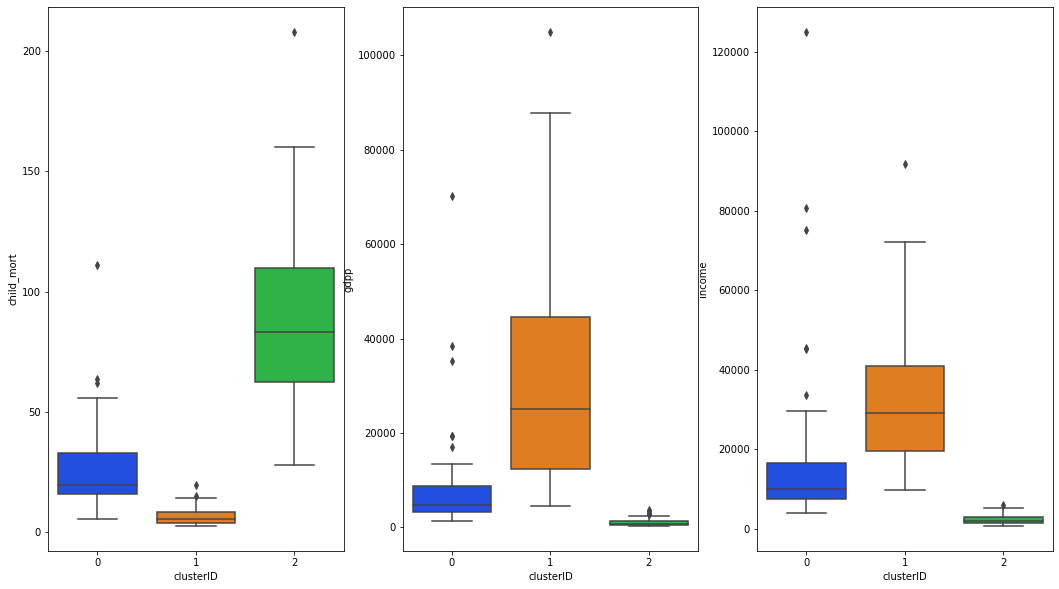

In [25]:
# Box plot on various variable against the 'clusterID' to visualize the spread of the data

plt.figure(figsize=(18, 10))
plt.subplot(1, 3, 1)
sns.boxplot(x='clusterID', y='child_mort',
            data=km_df, palette="bright")
plt.subplot(1, 3, 2)
sns.boxplot(x='clusterID', y='gdpp',
            data=km_df, palette="bright")
plt.subplot(1, 3, 3)
sns.boxplot(x='clusterID', y='income',
            data=km_df, palette="bright")

plt.show()

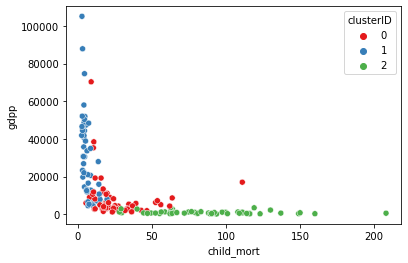

In [26]:
# Plotting the scatter plot using the clusters obtained
sns.scatterplot(x = 'child_mort', y = 'gdpp', hue ='clusterID', data = km_df, palette='Set1')
plt.show()

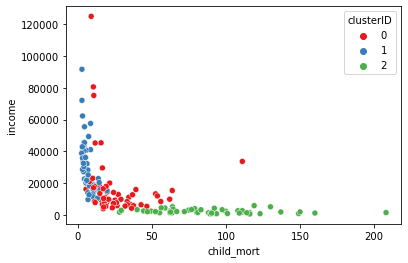

In [27]:
sns.scatterplot(x = 'child_mort', y = 'income', hue ='clusterID', data = km_df, palette='Set1')
plt.show()

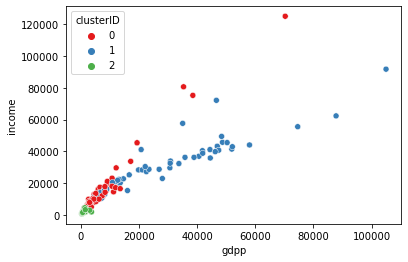

In [28]:
sns.scatterplot(x = 'gdpp', y = 'income', hue ='clusterID', data = km_df, palette='Set1')
plt.show()

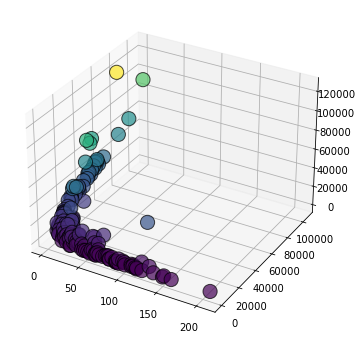

In [29]:
x = km_df['child_mort']
y = km_df['gdpp']
z = km_df['income']
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z,
           linewidths=1, alpha=.7,
           edgecolor='k',
           s = 200,
           c=z)
plt.show()

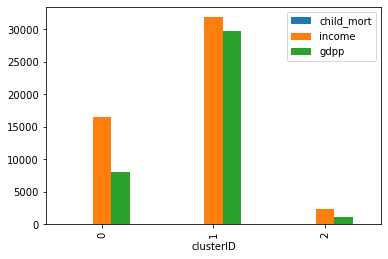

In [30]:
km_df.drop(['country','exports','health','imports','inflation','life_expec','total_fer'], axis = 1).groupby('clusterID').mean().plot(kind='bar')
plt.show()

In [31]:
# Checking the CLuster means:
km_df.groupby(['clusterID']).mean().sort_values(['child_mort','income','gdpp'],ascending = [False,True,True])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
clusterID,,,,,,,,,
2,87.033333,26.578412,6.283922,43.881684,2309.470588,11.080490,60.525490,4.766667,1066.549020
0,25.717742,40.790323,5.636452,42.079032,16521.935484,10.217758,71.804839,2.518548,8058.064516
1,6.627778,55.198148,8.671852,55.255556,31870.740741,1.869630,78.594444,1.723333,29833.703704


Here Cluster 1 has the highest Child Mortality Rate and lowest Income and GDPP.

In [32]:
f1_df = km_df[km_df['clusterID']==2].sort_values(by=['child_mort','gdpp','income'], ascending=[False, True, True])

In [33]:
len(f1_df)

51

In [34]:
f1_df.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusterID
66,Haiti,208.0,15.3,6.91,64.7,1500,5.45,32.1,3.33,662,2
132,Sierra Leone,160.0,16.8,13.10,34.5,1220,17.20,55.0,5.20,399,2
32,Chad,150.0,36.8,4.53,43.5,1930,6.39,56.5,6.59,897,2
31,Central African Republic,149.0,11.8,3.98,26.5,888,2.01,47.5,5.21,446,2
97,Mali,137.0,22.8,4.98,35.1,1870,4.37,59.5,6.55,708,2
113,Nigeria,130.0,25.3,5.07,17.4,5150,104.00,60.5,5.84,2330,2
112,Niger,123.0,22.2,5.16,49.1,814,2.55,58.8,7.49,348,2
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,2
37,"Congo, Dem. Rep.",116.0,41.1,7.91,49.6,609,20.80,57.5,6.54,334,2
25,Burkina Faso,116.0,19.2,6.74,29.6,1430,6.81,57.9,5.87,575,2


### Taking K = 4

In [35]:
# Now taking K = 4
kmean1 = KMeans (n_clusters=4, max_iter = 50, random_state=50)
kmean1.fit(new_data)

KMeans(max_iter=50, n_clusters=4, random_state=50)

In [36]:
kmean1.labels_

array([2, 1, 1, 2, 0, 1, 1, 3, 3, 1, 3, 0, 2, 3, 0, 0, 1, 2, 1, 1, 3, 1,
       3, 0, 0, 2, 2, 2, 2, 3, 1, 2, 2, 3, 1, 1, 2, 2, 1, 3, 2, 3, 0, 0,
       3, 1, 1, 1, 1, 1, 2, 0, 1, 3, 3, 1, 2, 1, 3, 2, 3, 1, 1, 2, 2, 1,
       2, 0, 3, 2, 1, 1, 1, 0, 3, 3, 1, 3, 1, 1, 2, 2, 0, 1, 2, 0, 0, 2,
       2, 1, 0, 0, 0, 2, 2, 0, 0, 2, 0, 2, 0, 2, 1, 1, 0, 1, 2, 2, 1, 2,
       3, 3, 2, 2, 3, 1, 2, 0, 1, 1, 1, 3, 3, 0, 1, 1, 2, 1, 1, 2, 3, 0,
       2, 0, 0, 0, 2, 1, 0, 3, 1, 1, 2, 1, 3, 3, 2, 2, 0, 2, 2, 1, 1, 1,
       1, 2, 1, 0, 3, 3, 3, 1, 1, 1, 1, 2, 2])

In [37]:
km1_df = pd.concat([df.reset_index().drop('index', axis = 1), pd.Series(kmean1.labels_)], axis = 1)
km1_df.columns = ['country','child_mort', 'exports','health', 'imports', 'income', 'inflation','life_expec','total_fer','gdpp','clusterID']
km1_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusterID
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,2
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,2
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0


In [38]:
km1_df['clusterID'].value_counts()

1    57
2    48
0    31
3    31
Name: clusterID, dtype: int64

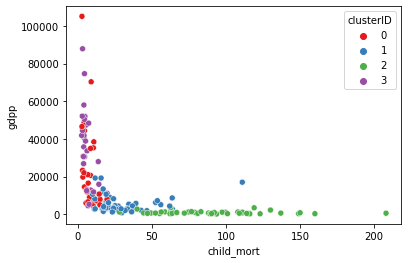

In [39]:
# Plotting the scatter plot using the clusters obtained
sns.scatterplot(x = 'child_mort', y = 'gdpp', hue ='clusterID', data = km1_df, palette='Set1')
plt.show()

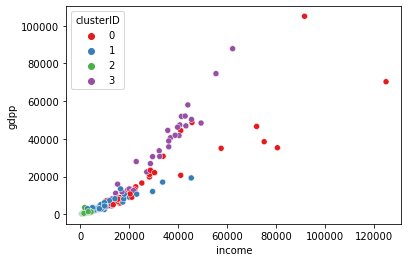

In [40]:
sns.scatterplot(x = 'income', y = 'gdpp', hue ='clusterID', data = km1_df, palette='Set1')
plt.show()

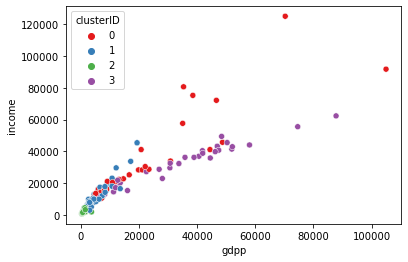

In [41]:
sns.scatterplot(x = 'gdpp', y = 'income', hue ='clusterID', data = km1_df, palette='Set1')
plt.show()

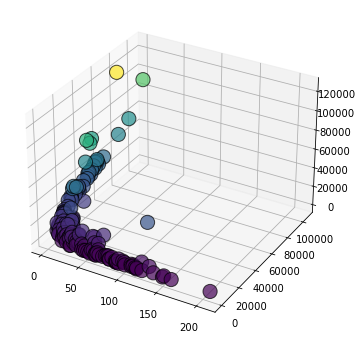

In [42]:
x = km1_df['child_mort']
y = km1_df['gdpp']
z = km1_df['income']
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z,
           linewidths=1, alpha=.7,
           edgecolor='k',
           s = 200,
           c=z)
plt.show()

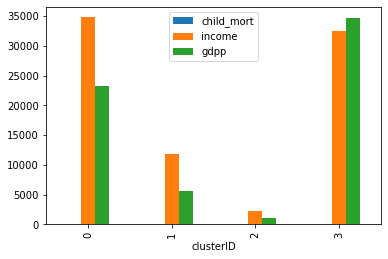

In [43]:
km1_df.drop(['country','exports','health','imports','inflation','life_expec','total_fer'], axis = 1).groupby('clusterID').mean().plot(kind='bar')
plt.show()

In [44]:
# Dropping the unncecessary columns and grouping according to clusterId's
km1_df.drop(['country','exports','health','imports','inflation','life_expec','total_fer'], axis = 1).groupby('clusterID').mean()

,child_mort,income,gdpp
clusterID,,,
0,8.177419,34787.096774,23309.032258
1,28.564912,11791.052632,5593.157895
2,89.916667,2226.104167,995.916667
3,6.238710,32445.806452,34703.870968


In [45]:
f2_df = km1_df[km1_df['clusterID']==2].sort_values(by=['child_mort','gdpp','income'], ascending=[False, True, True])

In [46]:
len(f2_df)

48

In [47]:
f2_df.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusterID
66,Haiti,208.0,15.3,6.91,64.7,1500,5.45,32.1,3.33,662,2
132,Sierra Leone,160.0,16.8,13.10,34.5,1220,17.20,55.0,5.20,399,2
32,Chad,150.0,36.8,4.53,43.5,1930,6.39,56.5,6.59,897,2
31,Central African Republic,149.0,11.8,3.98,26.5,888,2.01,47.5,5.21,446,2
97,Mali,137.0,22.8,4.98,35.1,1870,4.37,59.5,6.55,708,2
113,Nigeria,130.0,25.3,5.07,17.4,5150,104.00,60.5,5.84,2330,2
112,Niger,123.0,22.2,5.16,49.1,814,2.55,58.8,7.49,348,2
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,2
37,"Congo, Dem. Rep.",116.0,41.1,7.91,49.6,609,20.80,57.5,6.54,334,2
25,Burkina Faso,116.0,19.2,6.74,29.6,1430,6.81,57.9,5.87,575,2


### Taking K = 5

In [48]:
# Now taking K = 5
kmean2 = KMeans (n_clusters=5, max_iter = 50, random_state=50)
kmean2.fit(new_data)

KMeans(max_iter=50, n_clusters=5, random_state=50)

In [49]:
kmean2.labels_

array([0, 1, 2, 0, 3, 2, 2, 4, 4, 2, 4, 3, 0, 4, 3, 3, 1, 0, 1, 1, 4, 1,
       2, 2, 3, 0, 0, 1, 0, 4, 1, 0, 0, 4, 2, 2, 0, 0, 1, 4, 0, 4, 3, 3,
       4, 2, 1, 2, 1, 1, 0, 3, 1, 4, 4, 2, 0, 1, 4, 0, 4, 1, 1, 0, 0, 1,
       0, 3, 4, 0, 2, 2, 1, 3, 4, 4, 1, 4, 1, 2, 0, 0, 2, 1, 0, 3, 3, 0,
       0, 2, 3, 3, 3, 0, 0, 3, 3, 0, 3, 0, 3, 1, 1, 1, 3, 1, 0, 2, 1, 0,
       4, 4, 0, 0, 4, 2, 0, 3, 1, 2, 1, 4, 4, 2, 2, 2, 0, 1, 2, 0, 4, 3,
       0, 3, 3, 3, 1, 1, 4, 4, 2, 1, 0, 1, 4, 4, 0, 0, 3, 0, 0, 1, 1, 2,
       1, 0, 1, 3, 4, 4, 4, 1, 1, 2, 1, 0, 0])

In [50]:
km2_df = pd.concat([df.reset_index().drop('index', axis = 1), pd.Series(kmean2.labels_)], axis = 1)
km2_df.columns = ['country','child_mort', 'exports','health', 'imports', 'income', 'inflation','life_expec','total_fer','gdpp','clusterID']
km2_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusterID
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,3


In [51]:
kmean2.labels_

array([0, 1, 2, 0, 3, 2, 2, 4, 4, 2, 4, 3, 0, 4, 3, 3, 1, 0, 1, 1, 4, 1,
       2, 2, 3, 0, 0, 1, 0, 4, 1, 0, 0, 4, 2, 2, 0, 0, 1, 4, 0, 4, 3, 3,
       4, 2, 1, 2, 1, 1, 0, 3, 1, 4, 4, 2, 0, 1, 4, 0, 4, 1, 1, 0, 0, 1,
       0, 3, 4, 0, 2, 2, 1, 3, 4, 4, 1, 4, 1, 2, 0, 0, 2, 1, 0, 3, 3, 0,
       0, 2, 3, 3, 3, 0, 0, 3, 3, 0, 3, 0, 3, 1, 1, 1, 3, 1, 0, 2, 1, 0,
       4, 4, 0, 0, 4, 2, 0, 3, 1, 2, 1, 4, 4, 2, 2, 2, 0, 1, 2, 0, 4, 3,
       0, 3, 3, 3, 1, 1, 4, 4, 2, 1, 0, 1, 4, 4, 0, 0, 3, 0, 0, 1, 1, 2,
       1, 0, 1, 3, 4, 4, 4, 1, 1, 2, 1, 0, 0])

In [52]:
km2_df = pd.concat([df.reset_index().drop('index', axis = 1), pd.Series(kmean2.labels_)], axis = 1)
km2_df.columns = ['country','child_mort', 'exports','health', 'imports', 'income', 'inflation','life_expec','total_fer','gdpp','clusterID']
km2_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusterID
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,3


In [53]:
km2_df['clusterID'].value_counts()

0    44
1    39
4    31
3    27
2    26
Name: clusterID, dtype: int64

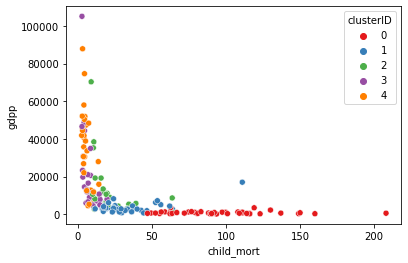

In [54]:
# Plotting the scatter plot using the clusters obtained
sns.scatterplot(x = 'child_mort', y = 'gdpp', hue ='clusterID', data = km2_df, palette='Set1')
plt.show()

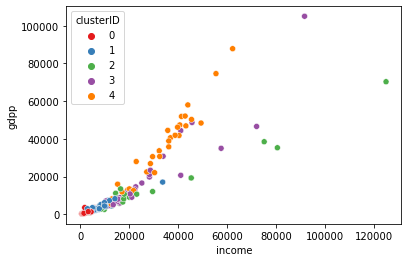

In [55]:
sns.scatterplot(x = 'income', y = 'gdpp', hue ='clusterID', data = km2_df, palette='Set1')
plt.show()

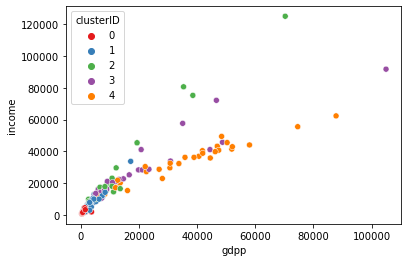

In [56]:
sns.scatterplot(x = 'gdpp', y = 'income', hue ='clusterID', data = km2_df, palette='Set1')
plt.show()

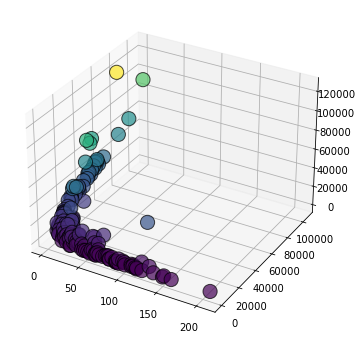

In [57]:
x = km2_df['child_mort']
y = km2_df['gdpp']
z = km2_df['income']
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z,
           linewidths=1, alpha=.7,
           edgecolor='k',
           s = 200,
           c=z)
plt.show()

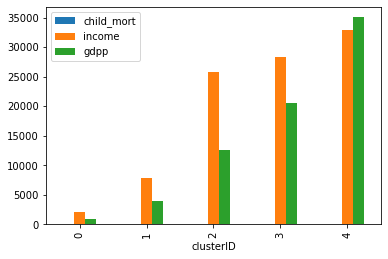

In [58]:
km2_df.drop(['country','exports','health','imports','inflation','life_expec','total_fer'], axis = 1).groupby('clusterID').mean().plot(kind='bar')
plt.show()

In [59]:
# Dropping the unncecessary columns and grouping according to clusterId's
km2_df.drop(['country','exports','health','imports','inflation','life_expec','total_fer'], axis = 1).groupby('clusterID').mean()

,child_mort,income,gdpp
clusterID,,,
0,94.070455,2170.295455,951.818182
1,32.635897,7910.000000,3896.051282
2,22.400000,25779.230769,12618.769231
3,8.114815,28414.814815,20606.666667
4,5.732258,32958.709677,35055.483871


In [60]:
f3_df = km1_df[km1_df['clusterID']==0].sort_values(by=['child_mort','gdpp','income'], ascending=[False, True, True])

In [61]:
len(f3_df)

31

In [62]:
f3_df.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusterID
117,Panama,19.7,70.0,8.10,78.2,15400,2.590,77.8,2.62,8080,0
100,Mauritius,15.0,51.2,6.00,62.2,15900,1.130,73.4,1.57,8000,0
148,Thailand,14.9,66.5,3.88,60.8,13500,4.080,76.6,1.55,5080,0
131,Seychelles,14.4,93.8,3.40,108.0,20400,-4.210,73.4,2.17,10800,0
96,Maldives,13.2,77.6,6.33,65.4,10500,2.880,77.9,2.23,7100,0
24,Bulgaria,10.8,50.2,6.87,53.0,15300,1.110,73.9,1.57,6840,0
82,Kuwait,10.8,66.7,2.63,30.4,75200,11.200,78.2,2.21,38500,0
23,Brunei,10.5,67.4,2.84,28.0,80600,16.700,77.1,1.84,35300,0
92,"Macedonia, FYR",10.4,39.8,7.09,58.1,11400,2.040,74.0,1.47,4540,0
86,Lebanon,10.3,35.8,7.03,60.2,16300,0.238,79.8,1.61,8860,0


## Hierarchial Clustering

In [63]:
new_data.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.266699,-1.671164,0.402266,0.064586,-1.368935,0.459416,-1.526455,1.544053,-1.462273
1,-0.220994,-0.380078,0.034400,0.226872,0.012538,-0.154659,0.621738,-0.992833,-0.121133
2,0.217834,0.105605,-0.991140,-0.610572,0.232275,1.059790,0.652698,0.313175,-0.063195
3,1.506186,0.943040,-1.727642,-0.026621,-0.408251,1.512843,-1.239045,1.623128,-0.219666
4,-0.637380,0.385850,-0.166030,0.641531,0.572583,-0.723442,0.699553,-0.368063,0.609228


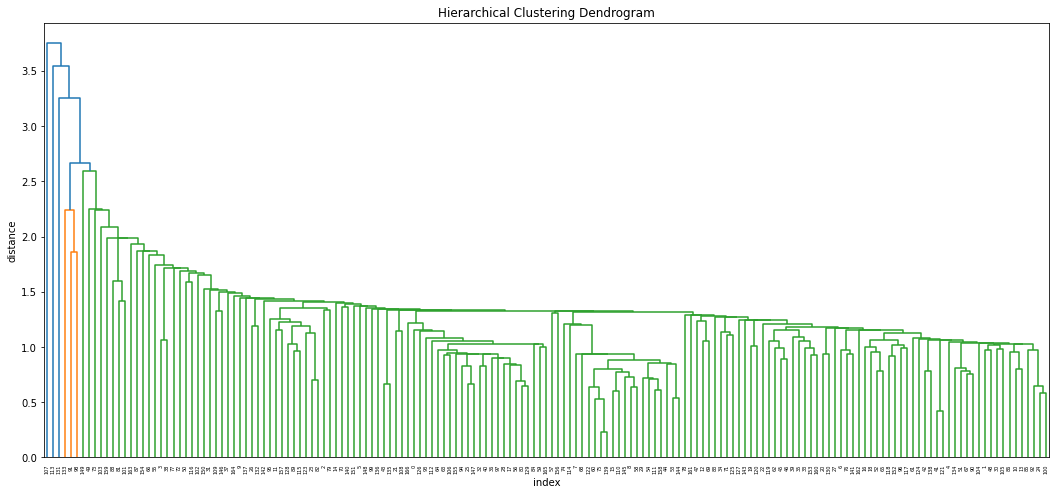

In [64]:
# Single linkage: : Here, the distance between 2 clusters is defined as the shortest distance between points in the two clusters.

plt.figure(figsize=(18, 8))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('index')
plt.ylabel('distance')
mergings_s = linkage(new_data, method="single", metric='euclidean')
dendrogram(mergings_s)
plt.show()

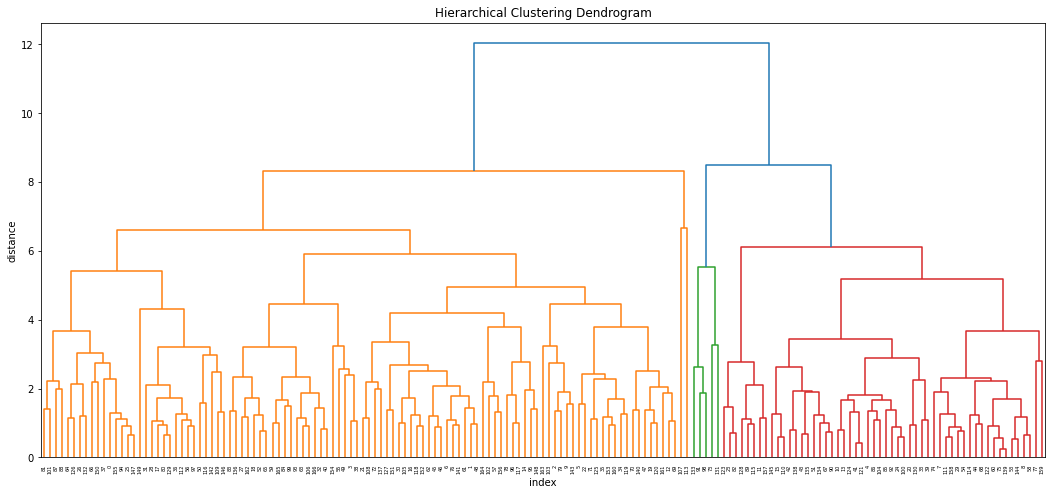

In [65]:
# Complete linkage : Here, the distance between 2 clusters is defined as the maximum distance between any 2 points in the clusters.

plt.figure(figsize=(18, 8))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('index')
plt.ylabel('distance')
mergings_c = linkage(new_data, method="complete", metric='euclidean')
dendrogram(mergings_c)
plt.show()

From the above Dendrograms, it is evident that 'Complete Linkage' give a better cluster formation. So we will use Complete linkage output for our further analysis. We will build two iterations of clustering with 3 & 4 clusters (based on inputs from the above Dendrogram with Complete Linkage) and analyse the output.

In [66]:
# 3 clusters
cluster_labels_3 = cut_tree(mergings_c, n_clusters=3).reshape(-1, )
cluster_labels_3

array([0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 2, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 2, 1, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 2,
       0, 2, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [67]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [68]:
# Create a new datafame with cluster labels to it.

df1 = df.copy()
df1['clusterID'] = cluster_labels_3

df1.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusterID
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1


In [69]:
df1.shape

(167, 11)

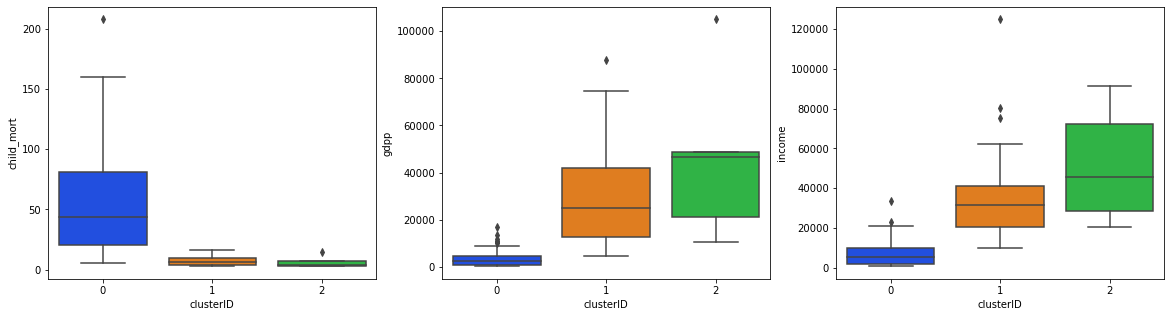

In [70]:
# Box plot on various variable against the Cluster label to visualize the spread of the data

plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
sns.boxplot(x='clusterID', y='child_mort', data=df1, palette="bright")
plt.subplot(1, 3, 2)
sns.boxplot(x='clusterID', y='gdpp', data=df1, palette="bright")
plt.subplot(1, 3, 3)
sns.boxplot(x='clusterID', y='income', data=df1, palette="bright")

plt.show()

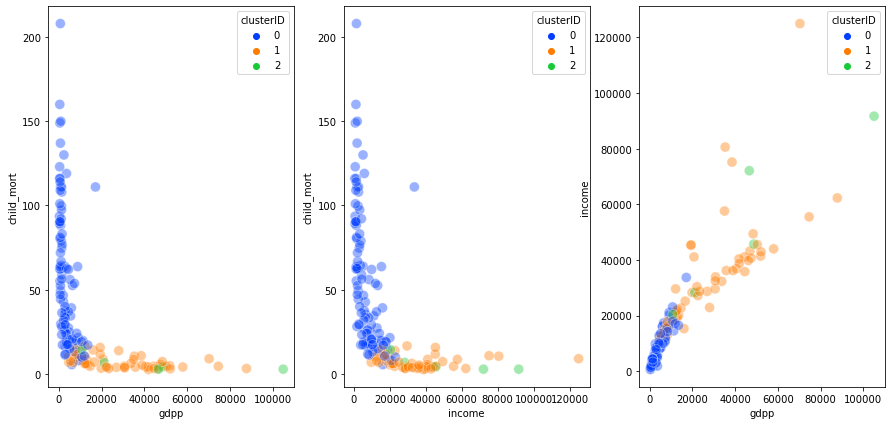

In [71]:
# Scatter plot on various variables to visualize the clusters based on them
 
plt.figure(figsize=(15,7))
plt.subplot(1, 3, 1)
sns.scatterplot(x='gdpp', y='child_mort', hue='clusterID',
                data=df1, legend='full', palette="bright", s=100, c= "lightblue", alpha=.4)
# labeling different cluster points with country names 

# for i, txt in enumerate(ngo_country_1.country):
#     plt.annotate(txt, (ngo_country_1.gdpp[i],ngo_country_1.child_mort[i]))

plt.subplot(1, 3, 2)
sns.scatterplot(x='income', y='child_mort', hue='clusterID',
                data=df1, legend='full', palette="bright", s=100, c='lightblue', alpha=.4)
plt.subplot(1, 3, 3)
sns.scatterplot(x='gdpp', y='income', hue='clusterID',
                data=df1, legend='full', palette="bright", s=100, c='lightblue', alpha=.4)
plt.show()

cluster 0 having low gdpp with both low and high child mortality value,cluster 2 having low child moratlity values with gdpp from ~ 10000 to 80000 and cluster 2 having only 1 datapoint

cluster 0 having low income with both low and high child mortality value,cluster 2 having low child moratlity values with gdpp from ~ 10000 to 80000 and cluster 2 having only 1 datapoint

In [72]:
df1.clusterID.value_counts()

0    108
1     54
2      5
Name: clusterID, dtype: int64

In [73]:
df1[df1["clusterID"]==2]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusterID
73,Ireland,4.2,103.0,9.19,86.5,45700,-3.220,80.4,2.05,48700,2
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000,2
98,Malta,6.8,153.0,8.65,154.0,28300,3.830,80.3,1.36,21100,2
131,Seychelles,14.4,93.8,3.40,108.0,20400,-4.210,73.4,2.17,10800,2
133,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46600,2


In [74]:
df1[df1['clusterID']==1].head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusterID
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200,1
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,1
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,1
10,Bahamas,13.8,35.0,7.89,43.7,22900,-0.393,73.8,1.86,28000,1
11,Bahrain,8.6,69.5,4.97,50.9,41100,7.440,76.0,2.16,20700,1


In [75]:
df1[df1['clusterID']==0].sort_values(by=['income','child_mort','gdpp'], ascending=[True,False,True]).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusterID
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.80,57.5,6.54,334,0
88,Liberia,89.3,19.10,11.80,92.6,700,5.47,60.8,5.02,327,0
26,Burundi,93.6,8.92,11.60,39.2,764,12.30,57.7,6.26,231,0
112,Niger,123.0,22.20,5.16,49.1,814,2.55,58.8,7.49,348,0
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.01,47.5,5.21,446,0


In [76]:
# 2nd iteration using cluster number as 4
cluster_labels_4 = cut_tree(mergings_c, n_clusters=4).reshape(-1, )
cluster_labels_4

array([0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 2, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 2, 1, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 1, 0, 0, 3, 0, 0,
       1, 1, 0, 3, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 2,
       0, 2, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [77]:
df1['clusterID2'] = cluster_labels_4

df1.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusterID,clusterID2
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1,1


In [78]:
df1.shape

(167, 12)

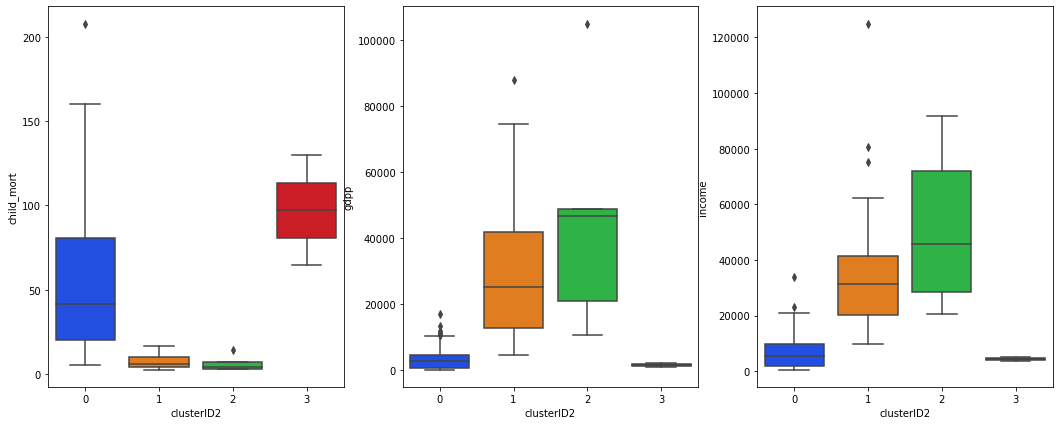

In [79]:
# Box plot on various variable against the CLUSTER_ID to visualize the spread of the data

plt.figure(figsize=(18, 7))
plt.subplot(1, 3, 1)
sns.boxplot(x='clusterID2', y='child_mort', data=df1, palette="bright")
plt.subplot(1, 3, 2)
sns.boxplot(x='clusterID2', y='gdpp', data=df1, palette="bright")
plt.subplot(1, 3, 3)
sns.boxplot(x='clusterID2', y='income', data=df1, palette="bright")

plt.show()

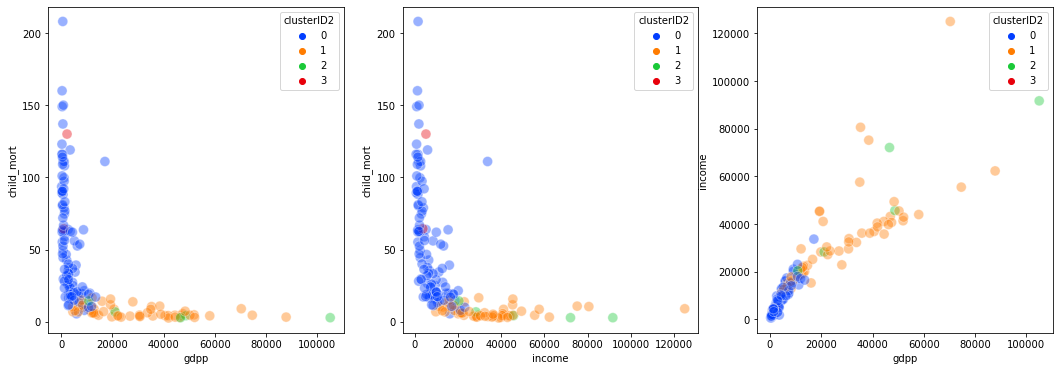

In [80]:
# Scatter plot on various variables to visualize the clusters based on them

plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
sns.scatterplot(x='gdpp', y='child_mort', hue='clusterID2',
                data=df1, legend='full', palette="bright", s=100, c='lightblue', alpha=.4)
plt.subplot(1, 3, 2)
sns.scatterplot(x='income', y='child_mort', hue='clusterID2',
                data=df1, legend='full', palette="bright", s=100, c='lightblue', alpha=.4)
plt.subplot(1, 3, 3)
sns.scatterplot(x='gdpp', y='income', hue='clusterID2',
                data=df1, legend='full', palette="bright", s=100, c='lightblue', alpha=.4)
plt.show()

From both these boxplots and scatterplots we are getting almost the same observations like cluster 3. Only cluster 1 which was having roughly all the developed and developing countries here divided into 2 clusters. one cluster having low child mortality, very high gdpp and income. And the other cluster is having low child mortality, and intermediate gdpp and income. Underdeveloped countries remain as same.

In [81]:
df1.clusterID2.value_counts()

0    106
1     54
2      5
3      2
Name: clusterID2, dtype: int64

In [82]:
df1[df1['clusterID2']==0].sort_values(by=['income','child_mort','gdpp'], ascending=[True,False,True]).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusterID,clusterID2
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.80,57.5,6.54,334,0,0
88,Liberia,89.3,19.10,11.80,92.6,700,5.47,60.8,5.02,327,0,0
26,Burundi,93.6,8.92,11.60,39.2,764,12.30,57.7,6.26,231,0,0
112,Niger,123.0,22.20,5.16,49.1,814,2.55,58.8,7.49,348,0,0
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.01,47.5,5.21,446,0,0


In [83]:
df_h_analysis =  df1.groupby(['clusterID']).mean()
df_h_analysis

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusterID2
clusterID,,,,,,,,,,
0,55.373148,33.538880,6.116389,44.010795,6936.509259,10.358019,66.283333,3.593704,3390.222222,0.055556
1,7.033333,46.633333,8.234815,44.685185,34367.037037,3.350481,78.261111,1.774630,29012.407407,1.000000
2,6.200000,144.960000,6.594000,132.900000,51640.000000,-0.005200,79.620000,1.672000,46440.000000,2.000000


In [84]:
# Creating a new field for count of observations in each cluster
df_h_analysis['Observations']=df1[['clusterID','child_mort']].groupby(['clusterID']).count()
df_h_analysis

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusterID2,Observations
clusterID,,,,,,,,,,,
0,55.373148,33.538880,6.116389,44.010795,6936.509259,10.358019,66.283333,3.593704,3390.222222,0.055556,108
1,7.033333,46.633333,8.234815,44.685185,34367.037037,3.350481,78.261111,1.774630,29012.407407,1.000000,54
2,6.200000,144.960000,6.594000,132.900000,51640.000000,-0.005200,79.620000,1.672000,46440.000000,2.000000,5


In [85]:
# Creating a new field for proportion of observations in each cluster
df_h_analysis['Proportion']=round(df_h_analysis['Observations']/df_h_analysis['Observations'].sum(),2)
df_h_analysis

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusterID2,Observations,Proportion
clusterID,,,,,,,,,,,,
0,55.373148,33.538880,6.116389,44.010795,6936.509259,10.358019,66.283333,3.593704,3390.222222,0.055556,108,0.65
1,7.033333,46.633333,8.234815,44.685185,34367.037037,3.350481,78.261111,1.774630,29012.407407,1.000000,54,0.32
2,6.200000,144.960000,6.594000,132.900000,51640.000000,-0.005200,79.620000,1.672000,46440.000000,2.000000,5,0.03


<Figure size 576x360 with 0 Axes>

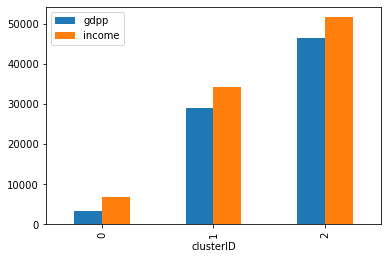

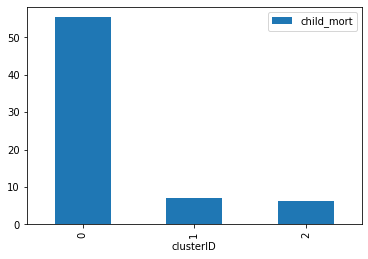

In [86]:
plt.figure(figsize=(8, 5))
df_country_h_plot1=df1[['clusterID','gdpp','income']].copy()
df_country_h_plot1=df_country_h_plot1.groupby('clusterID').mean()
df_country_h_plot1.plot.bar()

df_country_h_plot2=df1[['clusterID','child_mort']].copy()
df_country_h_plot2=df_country_h_plot2.groupby('clusterID').mean()
df_country_h_plot2.plot.bar()
plt.show()

## Final Model

From K-Means iterations, we have obtained better results so lets move forward with that. Thus we are considering the 'K-Means with 3 Clsuters' as our FINAL MODEL.

In [87]:
df_fin=km_df[km_df['clusterID']==2].sort_values(by=["gdpp",'child_mort','income'], ascending=[True, False, True])

In [88]:
df_fin.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusterID
26,Burundi,93.6,8.92,11.60,39.2,764,12.30,57.7,6.26,231,2
88,Liberia,89.3,19.10,11.80,92.6,700,5.47,60.8,5.02,327,2
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.80,57.5,6.54,334,2
112,Niger,123.0,22.20,5.16,49.1,814,2.55,58.8,7.49,348,2
132,Sierra Leone,160.0,16.80,13.10,34.5,1220,17.20,55.0,5.20,399,2
93,Madagascar,62.2,25.00,3.77,43.0,1390,8.79,60.8,4.60,413,2
106,Mozambique,101.0,31.50,5.21,46.2,918,7.64,54.5,5.56,419,2
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.01,47.5,5.21,446,2
94,Malawi,90.5,22.80,6.59,34.9,1030,12.10,53.1,5.31,459,2
50,Eritrea,55.2,4.79,2.66,23.3,1420,11.60,61.7,4.61,482,2


## Conclusion

Based on the K-Means clustering analysis, below are the top 5 countries that are in need if direst aid.

1. Burundi

2. Liberia

3. Congo, Dem. Rep

4. Niger

5. Sierra Leone

These countries have been chosen on the basis of low income, low gdpp and high child mortality rate.

In [89]:
print('The full length of the list is', len(df_fin))

The full length of the list is 51


Whereas the top 20 amongst the list are as follows:

In [90]:
df_fin.head(20)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusterID
26,Burundi,93.6,8.92,11.60,39.2,764,12.30,57.7,6.26,231,2
88,Liberia,89.3,19.10,11.80,92.6,700,5.47,60.8,5.02,327,2
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.80,57.5,6.54,334,2
112,Niger,123.0,22.20,5.16,49.1,814,2.55,58.8,7.49,348,2
132,Sierra Leone,160.0,16.80,13.10,34.5,1220,17.20,55.0,5.20,399,2
93,Madagascar,62.2,25.00,3.77,43.0,1390,8.79,60.8,4.60,413,2
106,Mozambique,101.0,31.50,5.21,46.2,918,7.64,54.5,5.56,419,2
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.01,47.5,5.21,446,2
94,Malawi,90.5,22.80,6.59,34.9,1030,12.10,53.1,5.31,459,2
50,Eritrea,55.2,4.79,2.66,23.3,1420,11.60,61.7,4.61,482,2
